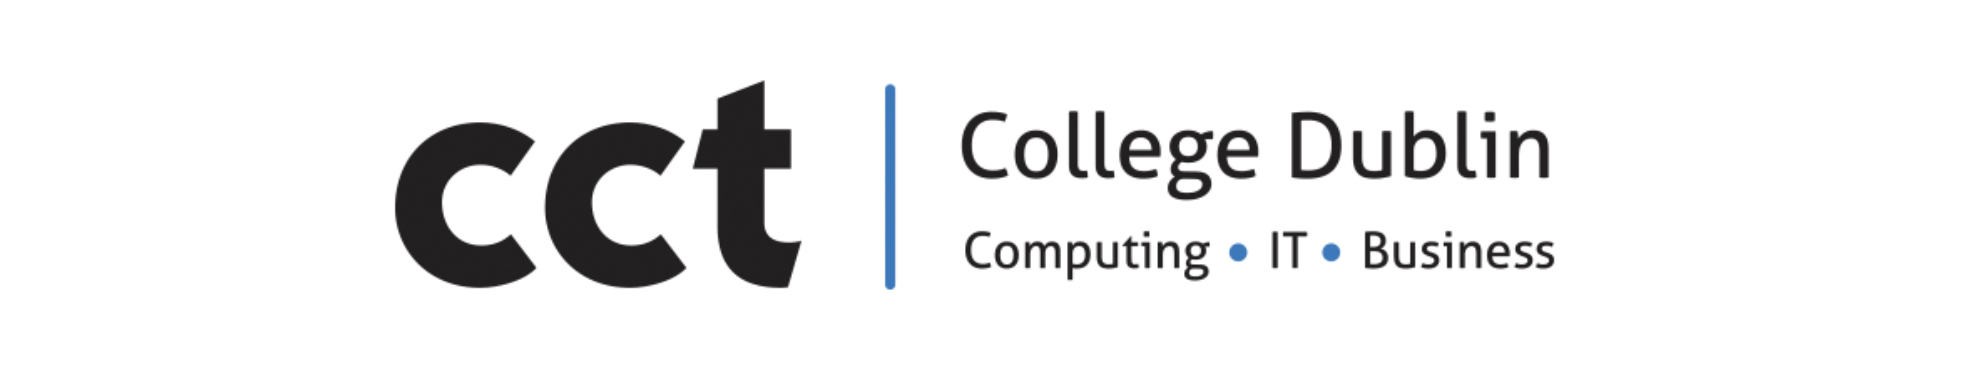

## Problem Solving In Industry
### Project: Menu Assistance 
#### Students: Kelly and Leo

----

###   Table of Contents:<a name="b"></a>

0. [Importing the required libraries for EDA](#0)
1. [Business Understanding ](#1)
2. [Data Undertanding](#2)                     
    2.1. [Loading the data into the Data Frame](#2.1)       
    2.2. [Getting some information of our datasets](#2.2)   
    2.3. [Visualisation for EDA](#2.3)   
3. [Data Preparation](#3)                     
    3.1. [Data Cleaning](#3.1)                     
    3.2. [Data reConstruction](#3.2)                     
    3.3. [Visualisation after Cleaning and reConstruction](#3.3)       
    3.4. [Data Integration](#3.4)                     
    3.5. [Visualisation after Data Integration](#3.5)       
4. [Modelling](#4)                     
    4.1. [Importing the required libraries for Machine Learning](#4.1)  
    4.2. [Getting start with Machine Learning](#4.2)             
    4.3. [Checking which model has the best result](#4.3)         
    4.4. [KNN algorithm - Model](#4.4)             
    4.5. [Decision Tree algorithm - Model](#4.5)             
    4.6. [PCA - Usupervised method](#4.6)             
5. [Evaluation](#5)                                                                                                        

---
## Importing libraries to be used in the project<a name="0"></a>
----

In [1]:
#libraries to be used in the project
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import pyplot
sns.set()

----
## 1. Business understanding<a name="1"></a>
-----
In this phase of the CRISP-DM process will be to determine the business objectives of our project, we will evaluate the aspects of the situation to produce the project plan, and from this which tools, datasets and machine learning will be used.
Our business proposal is to help chefs to create dishes for their restaurants with more accuracy and higher probability to be ordered by their customers. 
The main business goal of our project is to predict what ingredients customers would like to eat and from that, give restaurants ingredient suggestions to create their next menu. 
Therefore, our target clients would be restaurants, the business goal is to upgrade their menu, improve taste satisfaction to attract new customers and to keep existing ones.

(Please, read more in our Report)

----
## 2. Data understanding<a name="2"></a>
-----

In the second phase of the CRISP-DM process we are going to access the data using the resources listed in the first stage in Project resources. This stage is important for understanding the data and it will help us to make decisions during data  preparation.
We will cover collecting and describing the data, exploring the data using EDA to perform the investigations on our dataset and verifying the data quality. 

-------
### 2.1. Loading the dataset using pandas<a name="2.1"></a>

#### Fruit and vegetables consumptiondataset

In [2]:
dataFruitVeg = pd.read_csv("datasets/daily_consumption_fruit_vegetables_eu.csv")
dataFruitVeg.head()

,unit,n_portion,sex,age,country,time,value
0,PC,0,F,TOTAL,AT,2019,29.1
1,PC,0,F,TOTAL,BE,2019,17.1
2,PC,0,F,TOTAL,BG,2019,54.2
3,PC,0,F,TOTAL,CY,2019,32.7
4,PC,0,F,TOTAL,CZ,2019,49.6


#### Fish and Seafood consumption dataset 

In [3]:
dataFish = pd.read_csv("datasets/fish-and-seafood-consumption-per-capita.csv")
dataFish.head()

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


#### Meat consumption dataset 

In [4]:
dataMeatCon = pd.read_csv("datasets/meat_consumption_worldwide.csv") 
dataMeatCon.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


### 2.2. Getting some information of our datasets<a name="2.2"></a>

- Using the method .shape() to check how many columns and rows are in the dataset.

In [5]:
dataFruitVeg.shape

(43488, 7)

We can see that our Fruit/Veg dataset has 43488 rows and 7 columns.

In [6]:
dataFish.shape

(11028, 4)

We can see that our Fish/Seafood dataset has 11028 rows and 4 columns.

In [7]:
dataMeatCon.shape

(13760, 5)

We can see that our Meat dataset has 13760, rows and 5 columns.

- Using the method info() to check multiple infomrtion in the dataset. 

In [8]:
#to check data types
dataFruitVeg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43488 entries, 0 to 43487
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit       43488 non-null  object 
 1   n_portion  43488 non-null  object 
 2   sex        43488 non-null  object 
 3   age        43488 non-null  object 
 4   country    43488 non-null  object 
 5   time       43488 non-null  int64  
 6   value      35610 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


In [9]:
#to check data types
dataFish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Entity                                                          11028 non-null  object 
 1   Code                                                            9294 non-null   object 
 2   Year                                                            11028 non-null  int64  
 3   Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)  11028 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 344.8+ KB


In [10]:
#to check data types
dataMeatCon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  13760 non-null  object 
 1   SUBJECT   13760 non-null  object 
 2   MEASURE   13760 non-null  object 
 3   TIME      13760 non-null  int64  
 4   Value     13760 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 537.6+ KB


With the method info() we can see the number of the columns/variables, total number of rows (the size of the dataset), data types (if the variable is quantitative or qualitative), the memory usage also.

- Below we can take a look at the statistics of the features using the methos .describe()

In [11]:
dataFruitVeg.describe()

,time,value
count,43488.000000,35610.000000
mean,2016.500000,33.190211
std,2.500029,20.122211
min,2014.000000,0.000000
25%,2014.000000,14.000000
50%,2016.500000,33.600000
75%,2019.000000,48.900000
max,2019.000000,94.100000


In [12]:
dataFish.describe()

,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
count,11028.000000,11028.000000
mean,1989.461824,16.670872
std,16.320065,17.056281
min,1961.000000,0.000000
25%,1975.000000,5.340000
50%,1990.000000,11.995000
75%,2004.000000,22.512500
max,2017.000000,191.750000


In [13]:
dataMeatCon.describe()

,TIME,Value
count,13760.000000,1.376000e+04
mean,2008.175291,1.861701e+03
std,10.600740,9.385656e+03
min,1990.000000,1.669000e-09
25%,1999.000000,3.475390e+00
50%,2008.000000,2.313983e+01
75%,2017.000000,2.967790e+02
max,2026.000000,1.316073e+05


- Using .value_counts() to check the amount of entries and counts of unique values.

In [14]:
dataFruitVeg['time'].value_counts()

2019    21744
2014    21744
Name: time, dtype: int64

As we can see above there are only two years in the Fruit/Veg dataset 2014 and 2019, for now we can see that the values are the same for both years.

In [15]:
dataFruitVeg['country'].value_counts()

AT           1296
BE           1296
TR           1296
SK           1296
SI           1296
SE           1296
RO           1296
PT           1296
PL           1296
NO           1296
NL           1296
MT           1296
LV           1296
LU           1296
LT           1296
IT           1296
IS           1296
IE           1296
HU           1296
BG           1296
CY           1296
CZ           1296
DE           1296
DK           1296
EE           1296
EL           1296
ES           1296
EU28         1296
FI           1296
FR           1296
HR           1296
UK           1296
EU27_2020    1080
RS            936
Name: country, dtype: int64

We can see that our dataset has Ireland represented by IE with 1296 values.

In [16]:
#check if ireland is included
dataFish['Code'].value_counts()

AFG         57
NIC         57
MOZ         57
MMR         57
NAM         57
            ..
BEL         18
OWID_SRM    14
MNE         12
SRB         12
SDN          6
Name: Code, Length: 182, dtype: int64

In [17]:
dataMeatCon['LOCATION'].value_counts()

MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA      296
JPN      296
SSA      296
MEX      296
NZL      296
TUR      296
USA      296
TZA      296
ZMB      296
BGD      296
BRA      296
CHL      296
COL      296
EGY      296
CHN      294
ARG      294
AUS      292
KOR      292
UKR      288
KAZ      288
ETH      284
RUS      278
BRICS    278
EU28     276
OECD     274
WLD      262
NOR      148
CHE      148
Name: LOCATION, dtype: int64

Exploring the dataset Meat, we did not find Ireland, but we found the EU28 with 276 values. We will probably use it in the data preparation phase.

### 2.3. Visualisation for EDA<a name="2.3"></a> 

- Ploting using Pie Chart matplotlib to check the country's consumption.

<AxesSubplot:ylabel='value'>

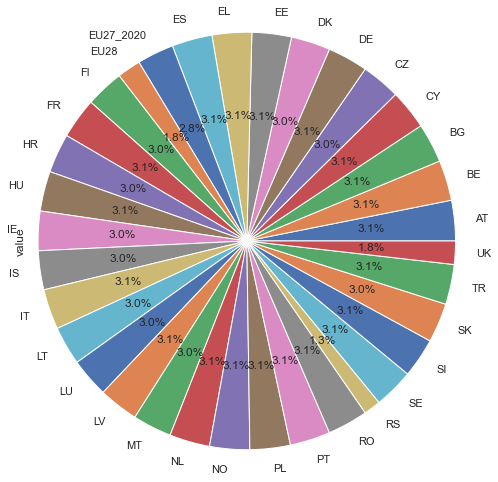

In [18]:
pieEDA_dataFruitVeg = dataFruitVeg.groupby('country')['value'].sum()
pieEDA_dataFruitVeg.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

Text(0, 0.5, 'Value/Quantity')

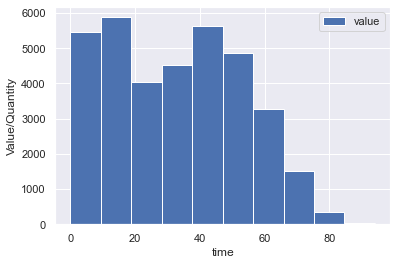

In [19]:
#dataFruitVeg.plot(kind = 'hist', x='time', figsize=(15,10))
dataFruitVeg.plot(kind = 'hist', x='time')
plt.xlabel("time")
plt.ylabel("Value/Quantity")

- Plotting a bar to explore the type of meat in the dataset and their consumption values

In [20]:
#dataFish.plot(kind = 'bar', x='Code', figsize=(20,10))

- Plotting a Pie Chart to explore the type of meat in the dataset and their consumption values in percentage.

<AxesSubplot:ylabel='Value'>

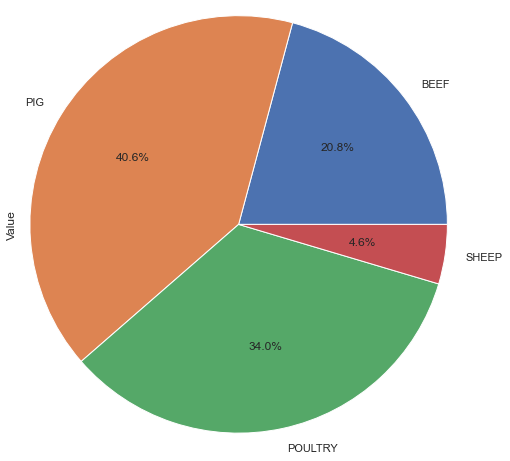

In [21]:
pieEDA_dataMeatCon = dataMeatCon.groupby('SUBJECT')['Value'].sum()
pieEDA_dataMeatCon.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')

We can see in the plot above that worldwide the consumption of PIG/pork is the highest in comparison to the other types of meat and that SHEEP/lamb is the lowest. In data preparation after cleaning the data, we will be able to check these values for EU28 and see if any change will occur.

----
## 3. Data preparation<a name="3"></a>
----- 

### 3.1. Data Cleaning <a name="3.1"></a>

#### Fruit and vegetables dataset - Cleaning

In [22]:
dataFruitVeg.shape

(43488, 7)

In [23]:
dataFruitVeg.isnull().values.any()

True

In [24]:
duplicate_rows_dataFruitVeg = dataFruitVeg[dataFruitVeg.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataFruitVeg.shape)

The number of duplicate rows are:  (5888, 7)


In [25]:
dataFruitVeg1 = dataFruitVeg

In [26]:
#using .dropna() to remove any NA
dataFruitVeg1 = dataFruitVeg1.replace('?', np.nan)
dataFruitVeg1 = dataFruitVeg1.dropna()
dataFruitVeg1 = dataFruitVeg1.apply(pd.to_numeric, errors='ignore')
#.drop_duplicates()
dataFruitVeg1 = dataFruitVeg1.drop_duplicates()

In [27]:
duplicate_rows_dataFruitVeg = dataFruitVeg1[dataFruitVeg1.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataFruitVeg.shape)

The number of duplicate rows are:  (0, 7)


In [28]:
dataFruitVeg1.isnull().values.any()

False

In [29]:
dataFruitVeg1.shape

(35188, 7)

### 3.2. Data reConstruction<a name="3.2"></a>

#### Fruit and vegetables dataset - reConstrution

In [30]:
dataFruitVeg2 = dataFruitVeg1.rename(columns={'time': 'year'})
dataFruitVeg2.head()

,unit,n_portion,sex,age,country,year,value
0,PC,0,F,TOTAL,AT,2019,29.1
1,PC,0,F,TOTAL,BE,2019,17.1
2,PC,0,F,TOTAL,BG,2019,54.2
3,PC,0,F,TOTAL,CY,2019,32.7
4,PC,0,F,TOTAL,CZ,2019,49.6


In [31]:
dataFruitVeg3 = dataFruitVeg2.drop(columns=['unit', 'n_portion','sex', 'age'])
dataFruitVeg3.head()

,country,year,value
0,AT,2019,29.1
1,BE,2019,17.1
2,BG,2019,54.2
3,CY,2019,32.7
4,CZ,2019,49.6


In [32]:
#dataFruitVeg3['ingredient'] = pd.Series(["VEGETABLE" for x in range(len(dataFruitVeg3.index))])
dataFruitVeg3.insert(1,'ingredient','VEGETABLE')
dataFruitVeg3.head()

,country,ingredient,year,value
0,AT,VEGETABLE,2019,29.1
1,BE,VEGETABLE,2019,17.1
2,BG,VEGETABLE,2019,54.2
3,CY,VEGETABLE,2019,32.7
4,CZ,VEGETABLE,2019,49.6


In [33]:
#isolating ireland 
IEfruit_df = dataFruitVeg3.loc[dataFruitVeg3['country'] == ('IE')]
IEfruit_df.head()

,country,ingredient,year,value
16,IE,VEGETABLE,2019,24.5
82,IE,VEGETABLE,2019,27.3
116,IE,VEGETABLE,2019,27.9
183,IE,VEGETABLE,2019,26.7
281,IE,VEGETABLE,2019,44.1


In [34]:
IEfruit_df.shape

(1078, 4)

#### Fish and Seafood dataset - Cleaning

In [35]:
dataFish.shape

(11028, 4)

In [36]:
dataFish.isnull().values.any()

True

In [37]:
duplicate_rows_dataFish = dataFish[dataFish.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataFish.shape)

The number of duplicate rows are:  (0, 4)


In [38]:
dataFish1 = dataFish

In [39]:
#using .dropna() to remove any NA
dataFish1 = dataFish1.replace('?', np.nan)
dataFish1 = dataFish1.dropna()
dataFish1 = dataFish1.apply(pd.to_numeric, errors='ignore')

In [40]:
dataFish1.isnull().values.any()

False

In [41]:
dataFish1.shape

(9294, 4)

#### Fish and Seafood dataset - reContrution

In [42]:
dataFish2 = dataFish1.rename(columns={'Year': 'year','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)':'value','Code':'country'})
dataFish2.head()

,Entity,country,year,value
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03


In [43]:
dataFish3 = dataFish2.drop(columns=['Entity'])
dataFish3.head()

,country,year,value
0,AFG,1961,0.03
1,AFG,1962,0.03
2,AFG,1963,0.03
3,AFG,1964,0.03
4,AFG,1965,0.03


In [44]:
dataFish3.insert(1,'ingredient','FISH&SEAFOOD')
dataFish3.tail()

,country,ingredient,year,value
11023,ZWE,FISH&SEAFOOD,2013,2.82
11024,ZWE,FISH&SEAFOOD,2014,3.39
11025,ZWE,FISH&SEAFOOD,2015,3.82
11026,ZWE,FISH&SEAFOOD,2016,3.79
11027,ZWE,FISH&SEAFOOD,2017,3.73


In [45]:
dataFish4 = dataFish3.replace({'country': 'IRL'}, 'IE')

In [46]:
#isolate IRL Ireland 
IEFish_df = dataFish4.loc[dataFish4['country'] == ('IE')]
IEFish_df.head()

,country,ingredient,year,value
4708,IE,FISH&SEAFOOD,1961,7.10
4709,IE,FISH&SEAFOOD,1962,7.28
4710,IE,FISH&SEAFOOD,1963,8.12
4711,IE,FISH&SEAFOOD,1964,8.59
4712,IE,FISH&SEAFOOD,1965,9.56


#### Meat consumption dataset - Cleaning
(by different types of meat)

In [47]:
dataMeatCon.shape

(13760, 5)

In [48]:
dataMeatCon.isnull().values.any()

False

In [49]:
duplicate_rows_dataMeatcon = dataMeatCon[dataMeatCon.duplicated()]
print("The number of duplicate rows are: ", duplicate_rows_dataMeatcon.shape)

The number of duplicate rows are:  (0, 5)


#### Meat consumption dataset - reContruction

In [50]:
dataMeatCon1 = dataMeatCon

In [51]:
dataMeatCon2 = dataMeatCon1.rename(columns={'TIME': 'year','Value': 'value','LOCATION': 'country','SUBJECT': 'ingredient'})
dataMeatCon2.head()

,country,ingredient,MEASURE,year,value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [52]:
dataMeatCon3 = dataMeatCon2.drop(columns=['MEASURE'])
dataMeatCon3.head()

,country,ingredient,year,value
0,AUS,BEEF,1991,27.721815
1,AUS,BEEF,1992,26.199591
2,AUS,BEEF,1993,26.169094
3,AUS,BEEF,1994,25.456134
4,AUS,BEEF,1995,25.340226


In [53]:
#isolate EU28
EUMeat_df = dataMeatCon3.loc[dataMeatCon3['country'] == ('EU28')]
EUMeat_df.head()

,country,ingredient,year,value
6580,EU28,BEEF,2000,12.677364
6581,EU28,BEEF,2001,12.009464
6582,EU28,BEEF,2002,12.535008
6583,EU28,BEEF,2003,12.314197
6584,EU28,BEEF,2004,12.520383


### 3.3. Visualisation after Data Cleaning and reConstruction<a name="3.3"></a>

#### Fruit & Vegetables dataset - Visualisation

Text(1.0, 1.0, 'Ireland Fruit&Vegetables consumption')

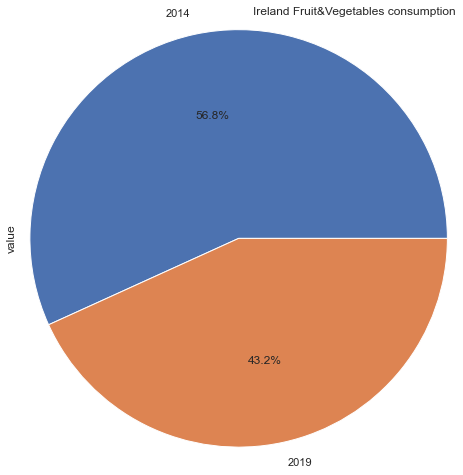

In [54]:
pie_IEfruit_df = IEfruit_df.groupby('year')['value'].sum()
pie_IEfruit_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("Ireland Fruit&Vegetables consumption", loc = 'right')

In [55]:
#IEfruit.plot(kind = 'kde', x='country', y='value', figsize=(15,10))
#plt.title("Ireland Fruit&Vegetables consumption")
#plt.ylabel("Value/Quantity")

Text(0.5, 1.0, 'Ireland Fruit&Vegetables consumption')

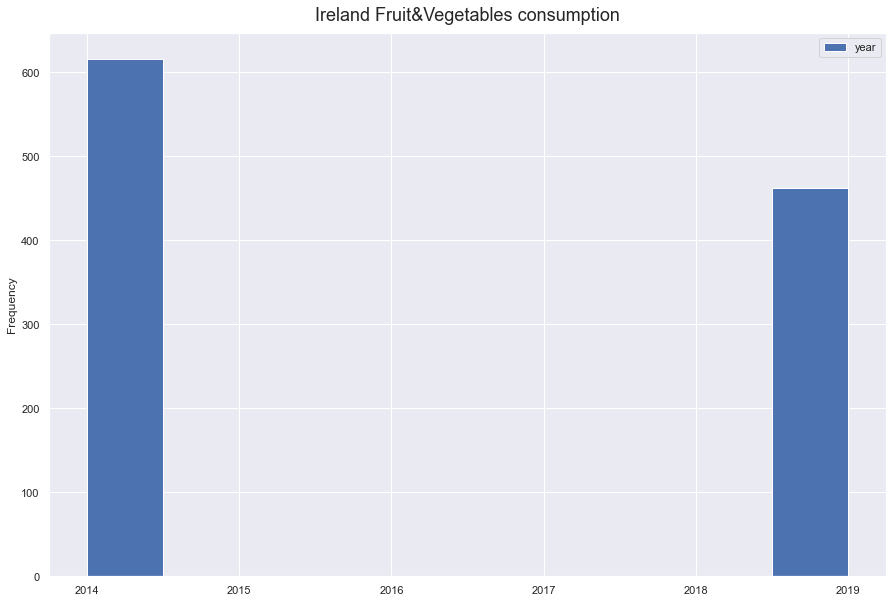

In [56]:
IEfruit_df.plot(kind = 'hist', x='country', y='year',figsize=(15,10))
plt.title("Ireland Fruit&Vegetables consumption", fontdict={'fontsize':18}, pad=12)

#### Fish and Seafood dataset - Visualisation

In [57]:
#dataFish4.plot(kind = 'bar', x='year', figsize=(15,10))
#plt.title("WorlWide Fish&Seafood consumption", fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Ireland Fish&Seafood consumption')

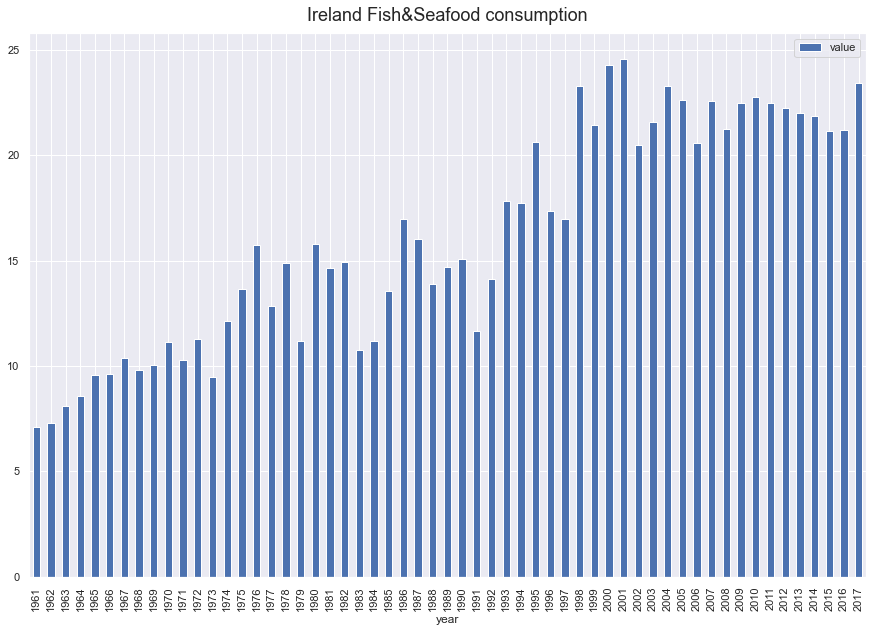

In [58]:
IEFish_df.plot(kind = 'bar', x='year', figsize=(15,10))
plt.title("Ireland Fish&Seafood consumption", fontdict={'fontsize':18}, pad=12)

Text(0.0, 1.0, 'Ireland Fish&Seafood consumption')

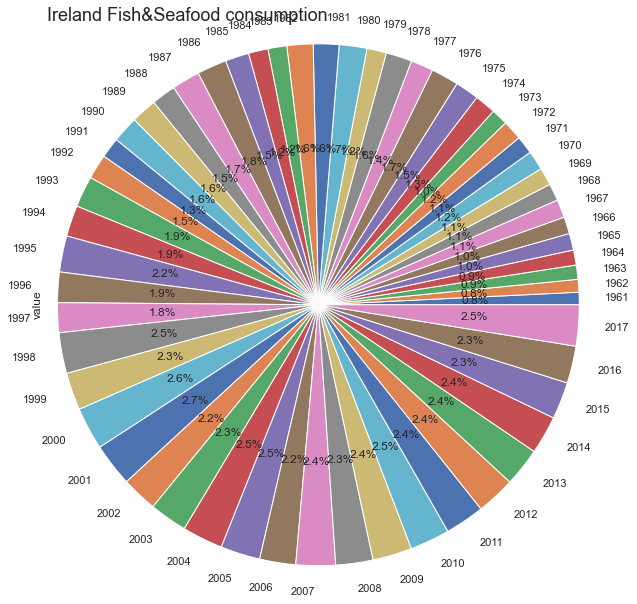

In [59]:
pie_IEFish_df = IEFish_df.groupby('year')['value'].sum()
pie_IEFish_df.plot.pie(figsize=(10,10), radius=1.2, autopct='%1.1f%%')
plt.title("Ireland Fish&Seafood consumption", loc = 'left', fontdict={'fontsize':18}, pad=12)

#### Meat consumption dataset - Visualisation 

Text(0.0, 1.0, 'WorldWide Meat consumption')

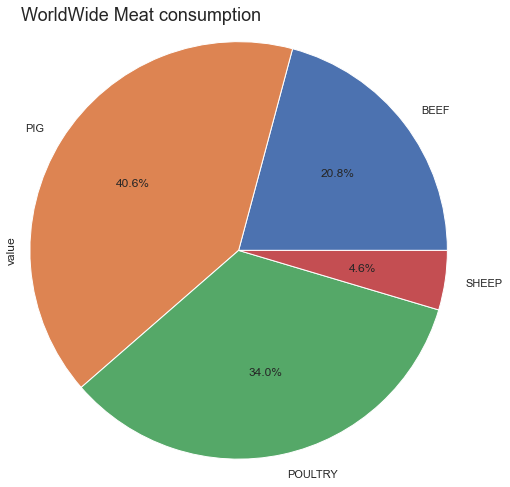

In [60]:
pie_Meat_df1 = dataMeatCon3.groupby('ingredient')['value'].sum()
pie_Meat_df1.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("WorldWide Meat consumption", loc='left', fontdict={'fontsize':18}, pad=12)

Text(0.0, 1.0, 'EU28 Meat consumption')

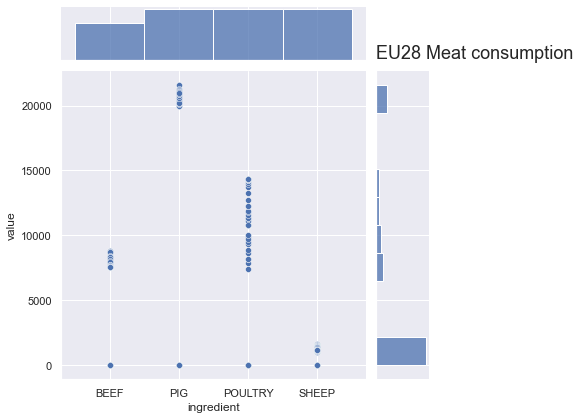

In [61]:
sns.jointplot(x="ingredient", y="value", data=EUMeat_df);
plt.title("EU28 Meat consumption", loc='left', fontdict={'fontsize':18}, pad=12)

- Plotting using Pie to explore the consumption in EU28

Text(0.0, 1.0, 'EU28 Meat consumption')

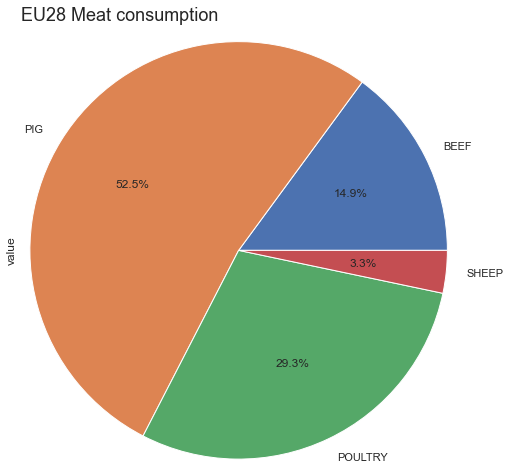

In [62]:
pie_EUMeat_df = EUMeat_df.groupby('ingredient')['value'].sum()
pie_EUMeat_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("EU28 Meat consumption", loc='left', fontdict={'fontsize':18}, pad=12)

We see that the above plot has a different result in comparison the same graphic worldwide figures.
Here we can see that EU28 consumes more PIG and less BEEF in comparison with the worldwide figures.

### 3.3. Data Integration <a name="3.3"></a>

#### World Wide Consumption dataset integration

In [63]:
pieces = {"a":dataFruitVeg3,"b":dataFish4,"c":dataMeatCon3} 
TOTALdataIngredients = pd.concat(pieces)

In [64]:
TOTALdataIngredients.shape

(58242, 4)

In [65]:
TOTALdataIngredients.groupby('ingredient').size()

ingredient
BEEF             3399
FISH&SEAFOOD     9294
PIG              3447
POULTRY          3457
SHEEP            3457
VEGETABLE       35188
dtype: int64

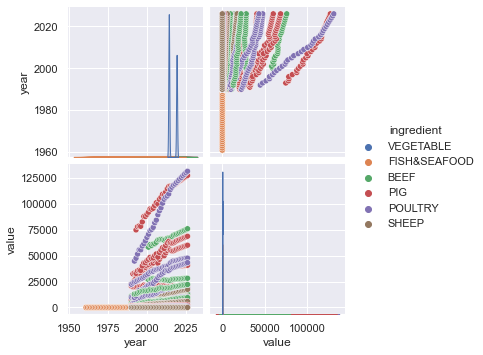

In [66]:
sns.pairplot(TOTALdataIngredients, hue = 'ingredient')

<Figure size 720x720 with 0 Axes>

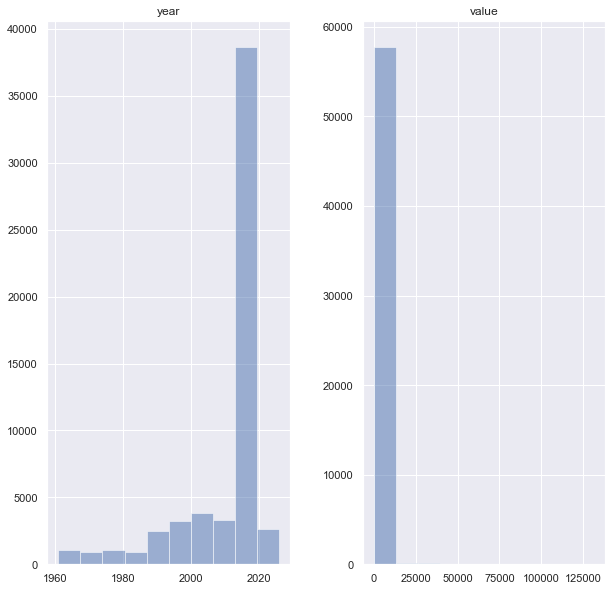

In [67]:
plt.figure (figsize= (10,10))
TOTALdataIngredients.hist(alpha = 0.5, figsize = (10,10))
plt.show()

<AxesSubplot:xlabel='count', ylabel='ingredient'>

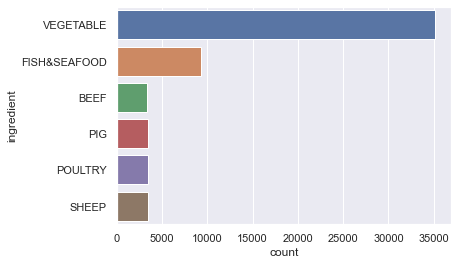

In [68]:
sns.countplot(y='ingredient', data=TOTALdataIngredients)

Text(0.0, 1.0, 'All countries consumption')

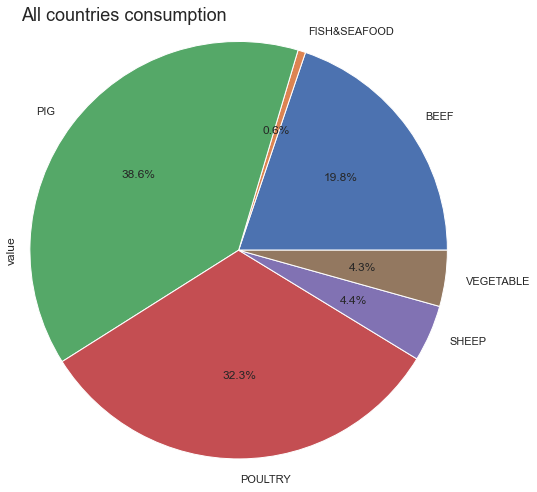

In [69]:
pie_TotalInt_df = TOTALdataIngredients.groupby('ingredient')['value'].sum()
pie_TotalInt_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("All countries consumption", loc='left', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'All countries Ingredients - Correlation Heatmap')

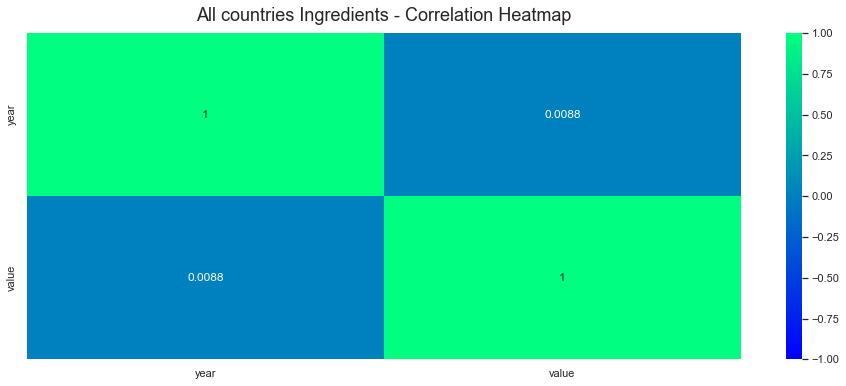

In [70]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(TOTALdataIngredients.corr(), vmin=-1, vmax=1, annot=True, cmap='winter')
heatmap.set_title('All countries Ingredients - Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

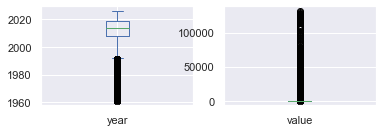

In [71]:
TOTALdataIngredients.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

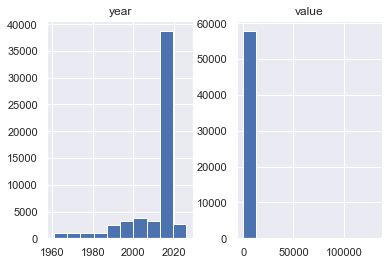

In [72]:
TOTALdataIngredients.hist()
pyplot.show()

#### Ireland & EU28 Consumption dataset integration

In [73]:
pieces = {"a":IEfruit_df,"b":IEFish_df,"c":EUMeat_df} 
IE_EU28dataIngredients = pd.concat(pieces)

In [74]:
IE_EU28dataIngredients.head()

country ingredient  year  value
a 16       IE  VEGETABLE  2019   24.5
  82       IE  VEGETABLE  2019   27.3
  116      IE  VEGETABLE  2019   27.9
  183      IE  VEGETABLE  2019   26.7
  281      IE  VEGETABLE  2019   44.1

In [75]:
IE_EU28dataIngredients.shape

(1411, 4)

<AxesSubplot:xlabel='count', ylabel='ingredient'>

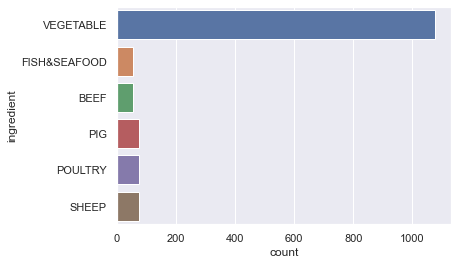

In [76]:
sns.countplot(y='ingredient', data=IE_EU28dataIngredients)

Text(0.0, 1.0, 'IE & EU28 consumption')

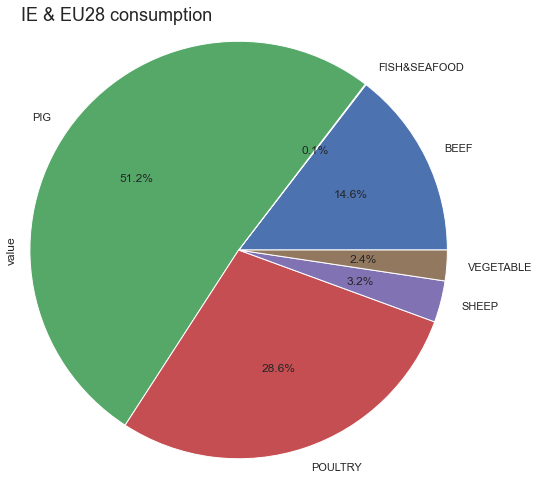

In [77]:
pie_IE_EU28Int_df = IE_EU28dataIngredients.groupby('ingredient')['value'].sum()
pie_IE_EU28Int_df.plot.pie(figsize=(8,8), radius=1.2, autopct='%1.1f%%')
plt.title("IE & EU28 consumption", loc='left', fontdict={'fontsize':18}, pad=12)

### 3.2. Prepare the data for the next phase: Modelling <a name="3.2"></a>

#### Checking if the integrated dataset is ready to use ML: are the data types all numeric?

In [78]:
TOTALdataIngredients.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 58242 entries, ('a', 0) to ('c', 13759)
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     58242 non-null  object 
 1   ingredient  58242 non-null  object 
 2   year        58242 non-null  int64  
 3   value       58242 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [79]:
TOTALdataIngredients_num = TOTALdataIngredients

In [80]:
country = TOTALdataIngredients_num.country.unique()
country_list = country.tolist()
country_list

['AT',
 'BE',
 'BG',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EE',
 'EL',
 'ES',
 'EU27_2020',
 'FI',
 'FR',
 'HR',
 'HU',
 'IE',
 'IS',
 'IT',
 'LT',
 'LU',
 'LV',
 'MT',
 'NL',
 'NO',
 'PL',
 'PT',
 'RO',
 'RS',
 'SE',
 'SI',
 'SK',
 'TR',
 'EU28',
 'UK',
 'AFG',
 'ALB',
 'DZA',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'KHM',
 'CMR',
 'CAN',
 'CPV',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'OWID_CZS',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'EST',
 'SWZ',
 'ETH',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRD',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LTU',
 'LUX',
 'MA

In [81]:
def generate_id(itr, fn):
    return dict(zip(itr, map(fn, itr)))

In [82]:
country_id = generate_id(country_list, lambda x: country_list.index(x) + 1)

In [83]:
country_id

{'AT': 1,
 'BE': 2,
 'BG': 3,
 'CY': 4,
 'CZ': 5,
 'DE': 6,
 'DK': 7,
 'EE': 8,
 'EL': 9,
 'ES': 10,
 'EU27_2020': 11,
 'FI': 12,
 'FR': 13,
 'HR': 14,
 'HU': 15,
 'IE': 16,
 'IS': 17,
 'IT': 18,
 'LT': 19,
 'LU': 20,
 'LV': 21,
 'MT': 22,
 'NL': 23,
 'NO': 24,
 'PL': 25,
 'PT': 26,
 'RO': 27,
 'RS': 28,
 'SE': 29,
 'SI': 30,
 'SK': 31,
 'TR': 32,
 'EU28': 33,
 'UK': 34,
 'AFG': 35,
 'ALB': 36,
 'DZA': 37,
 'AGO': 38,
 'ATG': 39,
 'ARG': 40,
 'ARM': 41,
 'AUS': 42,
 'AUT': 43,
 'AZE': 44,
 'BHS': 45,
 'BGD': 46,
 'BRB': 47,
 'BLR': 48,
 'BEL': 49,
 'BLZ': 50,
 'BEN': 51,
 'BMU': 52,
 'BOL': 53,
 'BIH': 54,
 'BWA': 55,
 'BRA': 56,
 'BRN': 57,
 'BGR': 58,
 'BFA': 59,
 'KHM': 60,
 'CMR': 61,
 'CAN': 62,
 'CPV': 63,
 'CAF': 64,
 'TCD': 65,
 'CHL': 66,
 'CHN': 67,
 'COL': 68,
 'COG': 69,
 'CRI': 70,
 'CIV': 71,
 'HRV': 72,
 'CUB': 73,
 'CYP': 74,
 'CZE': 75,
 'OWID_CZS': 76,
 'DNK': 77,
 'DJI': 78,
 'DMA': 79,
 'DOM': 80,
 'ECU': 81,
 'EGY': 82,
 'SLV': 83,
 'EST': 84,
 'SWZ': 85,
 'ETH': 8

In [84]:
TOTALdataIngredients_num['country'] = TOTALdataIngredients_num['country'].map(country_id)

In [85]:
ingredient_id = {"VEGETABLE":1, "BEEF":2, "SHEEP":3, "POULTRY":4, "PIG":5, "FISH&SEAFOOD":6}
TOTALdataIngredients_num["ingredient"]=TOTALdataIngredients_num["ingredient"].map(ingredient_id)
TOTALdataIngredients_num.head()

country  ingredient  year  value
a 0        1           1  2019   29.1
  1        2           1  2019   17.1
  2        3           1  2019   54.2
  3        4           1  2019   32.7
  4        5           1  2019   49.6

<AxesSubplot:xlabel='count', ylabel='ingredient'>

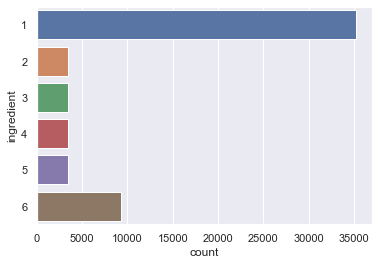

In [86]:
sns.countplot(y='ingredient', data=TOTALdataIngredients_num)

----
## 4. Modelling<a name="4"></a>
----

### 4.1. Importing the required libraries for Machine Learning <a name="4.1"></a>

In [87]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

#To ignore/control warning messages
import warnings
warnings.filterwarnings('ignore')

### 4.2. Getting start with Machine Learning <a name="4.2"></a>

As we prepared our dataset on the previous phase, we are ready to start our Machine Learning steps

In [88]:
TOTALdataIngredients_num = TOTALdataIngredients_num.reindex(columns=['country','ingredient','year','value'])

In [89]:
y=TOTALdataIngredients_num[['ingredient']]

In [90]:
X=TOTALdataIngredients_num[['country','year','value']]

In [91]:
y.dtypes

ingredient    int64
dtype: object

In [92]:
X.dtypes

country      int64
year         int64
value      float64
dtype: object

- Splitting

Splitting Train set and Test set, where the train set will be used to help the algorithm in learning the dataset' behavior.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 70)

In [94]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58242, 3), (58242, 1), (43681, 3), (14561, 3), (43681, 1), (14561, 1))

### 4.3. Checking which model has the best result <a name="4.3"></a>

In [95]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))

In [96]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.778622 (0.002404)
LDA: 0.742909 (0.004799)
KNN: 0.880543 (0.004741)
CART: 0.945331 (0.002178)
NB: 0.779240 (0.002632)


We can see above that Decision Tree/CART is probably the best model to be used for our project and KNN also might be a good option.

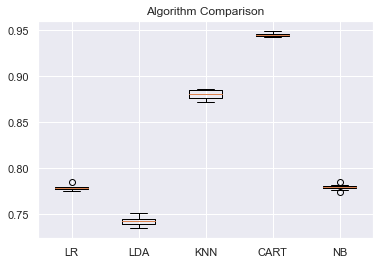

In [97]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

---------

### 4.4. KNN algorithm <a name="4.4"></a>

    - Training KNN

In [98]:
knn = KNeighborsClassifier(n_neighbors=36, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=36)

        - Testing KNN

In [99]:
#Predicting labels of unseen (test) data
#testing
knn.predict(X_test)

array([2, 1, 1, ..., 1, 1, 6])

In [100]:
y_pred = knn.predict(X_test)

In [101]:
print('KNN Accuracy is: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

KNN Accuracy is: 0.84


<AxesSubplot:xlabel='year', ylabel='ingredient'>

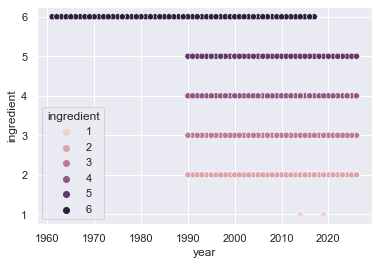

In [102]:
sns.scatterplot(
    x='year',
    y='ingredient',
    hue='ingredient',
    data=X_test.join(y_test, how='outer')
)

- Confusion Matrix - KNN 

In [103]:
print(confusion_matrix(y_test, y_pred))

[[8809    0    0    0    0    0]
 [   8  281  113  111  109  157]
 [   9  108  392   73  120  195]
 [  10  147   99  276  116  218]
 [  10   99  154  111  326  177]
 [   9   33   73   29   50 2139]]


- Confusion Matrix - KNN with heatmap

              precision    recall  f1-score   support

           1       0.99      1.00      1.00      8809
           2       0.42      0.36      0.39       779
           3       0.47      0.44      0.45       897
           4       0.46      0.32      0.38       866
           5       0.45      0.37      0.41       877
           6       0.74      0.92      0.82      2333

    accuracy                           0.84     14561
   macro avg       0.59      0.57      0.57     14561
weighted avg       0.83      0.84      0.83     14561



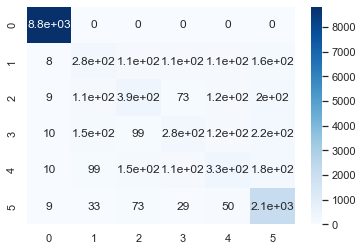

In [104]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap='Blues')
print(classification_report(y_test, y_pred))

VEGETABLE = 1 | BEEF = 2 | SHEEP = 3 | POULTRY = 4 | PIG = 5 | FISH&SEAFOOD = 6

According to KNN prediction, dishes with vegetables (1) and seafood (6) are the most likely to be ordered. 
84% 06/May

In [105]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print("Xtrain",X_train)
print("Xtest",X_test)

Xtrain [[-0.69372412 -2.28855309 -0.09557503]
 [-0.82827374  0.31282034 -0.09085387]
 [-0.79837382  0.70696783 -0.0962286 ]
 ...
 [ 0.77137177 -0.71196313 -0.0957454 ]
 [-0.75352395  0.31282034 -0.09117635]
 [-0.82827374  0.31282034 -0.09364873]]
Xtest [[ 1.80195197 -0.08616038 -0.02833393]
 [-0.58687849  0.70377876 -0.0980424 ]
 [-0.7371194   0.30880919 -0.10093961]
 ...
 [-0.82726394  0.70377876 -0.09775707]
 [-0.48170985  0.30880919 -0.09878865]
 [ 1.54654242 -2.45597783 -0.09824872]]


### 4.5. Decision Tree Algorithm <a name="4.5"></a>

In [106]:
features = ['country','year','value']
X = TOTALdataIngredients_num[features]
y = TOTALdataIngredients_num['ingredient']

In [107]:
print(X)

         country  year      value
a 0            1  2019  29.100000
  1            2  2019  17.100000
  2            3  2019  54.200000
  3            4  2019  32.700000
  4            5  2019  49.600000
...          ...   ...        ...
c 13755      131  2022  44.154151
  13756      131  2023  44.897588
  13757      131  2024  45.612107
  13758      131  2025  46.325312
  13759      131  2026  47.047207

[58242 rows x 3 columns]


In [108]:
print(y) 

a  0        1
   1        1
   2        1
   3        1
   4        1
           ..
c  13755    3
   13756    3
   13757    3
   13758    3
   13759    3
Name: ingredient, Length: 58242, dtype: int64


In [109]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [110]:
dtree.predict([[400,299,10]])

array([6])

In [111]:
dtree.predict([[400,299000999,10]])

array([2])

        - Training DecisionTree

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [113]:
dtree = DecisionTreeClassifier(max_depth = 6, random_state = 0)
dtree = dtree.fit(X_train, y_train)

        - Testing DecisionTree

In [114]:
#Predicting labels of unseen (test) data
#testing
dtree.predict(X_test)

array([6, 1, 4, ..., 1, 6, 1])

In [115]:
y_pred = dtree.predict(X_test)

In [116]:
#print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

In [117]:
print('Decision Tree Accuracy is: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))

Decision Tree Accuracy is: 0.83


Plotsting the Decision Tree using scikit-learn

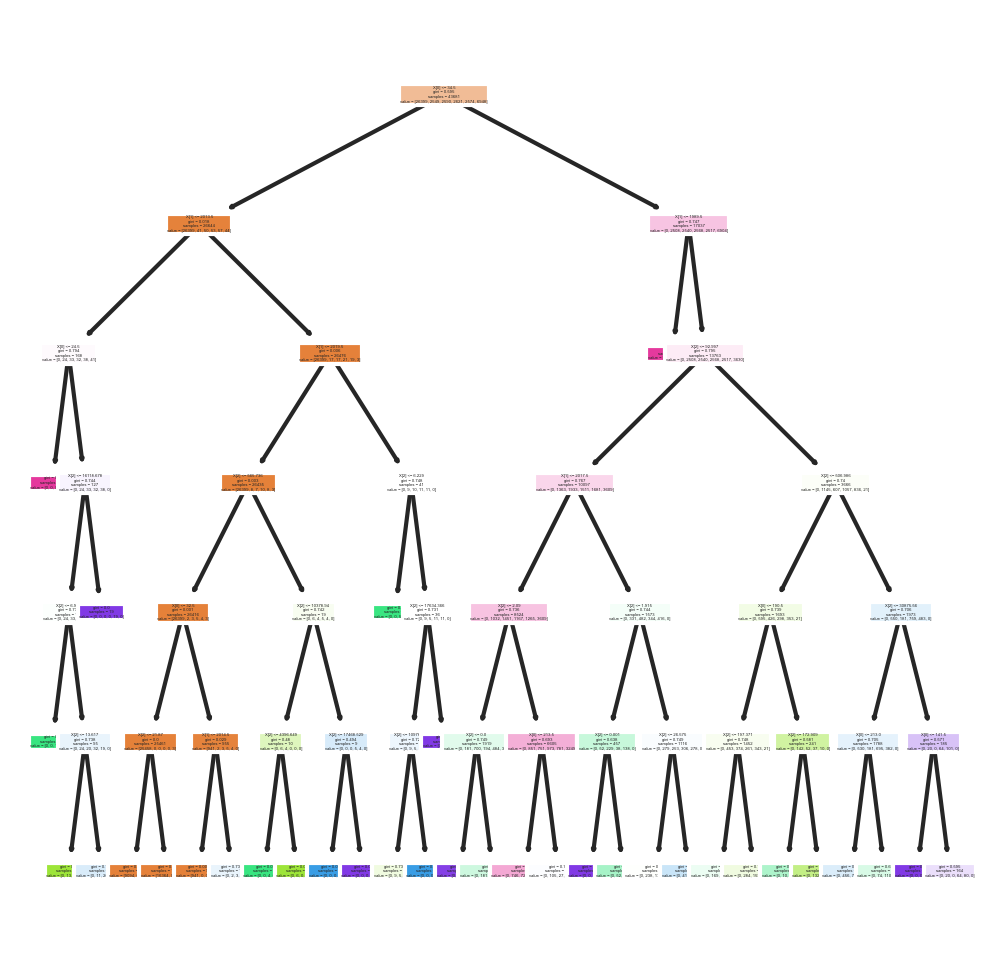

In [118]:
fig, axes = plt.subplots(nrows =1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree);
tree.plot_tree(dtree,filled=True);

- Confusion Matrix - Decision Tree Algorithm 

In [119]:
print(confusion_matrix(y_test, y_pred))

[[8789    0    0    0    0    0]
 [   1  229  138  220    7  255]
 [   1  134  419   64    0  249]
 [   0  111  113  309   16  287]
 [   0  137  183  150  138  265]
 [   1    0  111   14    3 2217]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8789
           2       0.37      0.27      0.31       850
           3       0.43      0.48      0.46       867
           4       0.41      0.37      0.39       836
           5       0.84      0.16      0.27       873
           6       0.68      0.95      0.79      2346

    accuracy                           0.83     14561
   macro avg       0.62      0.54      0.54     14561
weighted avg       0.83      0.83      0.81     14561



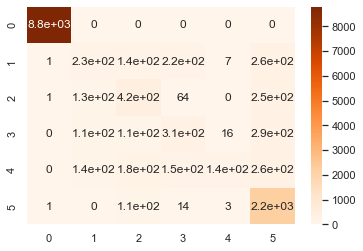

In [120]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap='Oranges')
print(classification_report(y_test, y_pred))

83% 06/May

In [121]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print("Xtrain",X_train)
print("Xtest",X_test)

Xtrain [[-0.43946091  0.31006688 -0.09538033]
 [-0.45440761  0.31006688 -0.0997324 ]
 [-0.54408781  0.31006688 -0.09586861]
 ...
 [-0.60387461  0.31006688 -0.09160146]
 [-0.75334161  0.31006688 -0.09045506]
 [-0.334834    1.17821332 -0.09224279]]
Xtest [[ 0.60036648 -1.96571475 -0.09816294]
 [-0.87296739  0.31706664 -0.09622716]
 [ 1.81812203  0.39578323  0.31982731]
 ...
 [-0.78276328  0.71064963 -0.09144492]
 [ 1.11152313 -0.78496576 -0.09379943]
 [-0.91806945  0.31706664 -0.0962958 ]]


### 4.6. Principal Component Analysis (PCA)  - Unsupervised Learning<a name="4.6"></a>
PCA is an Unsupervised Learning method and commonly used as a dimensionality reduction technique. The data does't have a label.
And by using dimensionality reduction, only the most important features are identified and used.

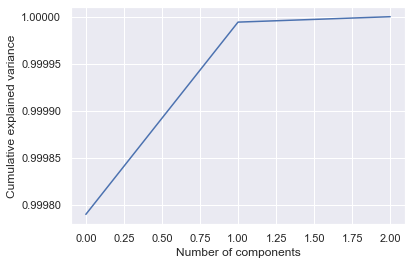

In [122]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

After applying PCA, we can see that we have 2.00 principal components in our dataset now, getting close to 99,5% of the original dataset variance. 

In [123]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X, y)

In [124]:
pca.explained_variance_ratio_

array([9.99789546e-01, 2.04683924e-04])

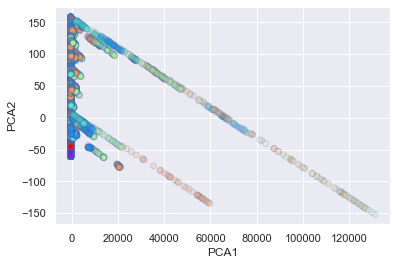

In [125]:
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.2,
    edgecolors='b'
)

In [126]:
print('transformed shape:', x_pca.shape)

transformed shape: (58242, 2)


Above we can see that the new principal components are only 2 columns with 58242 rows each.

In [127]:
print(pca.components_)

[[ 2.32680194e-03  2.39826456e-05  9.99997293e-01]
 [ 9.95627559e-01 -9.33831185e-02 -2.31439483e-03]]


Below we are naming the new two principal components

In [128]:
menuComp_pca = pd.DataFrame(x_pca, columns=["menuComp1","menuComp2"])

In [129]:
menuComp_pca.head()

,menuComp1,menuComp2
0,-433.712248,-60.882480
1,-445.709889,-59.859079
2,-408.607662,-58.949316
3,-430.105277,-57.903929
4,-413.202996,-56.947414


In [130]:
menuComp_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58242 entries, 0 to 58241
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   menuComp1  58242 non-null  float64
 1   menuComp2  58242 non-null  float64
dtypes: float64(2)
memory usage: 910.2 KB


In [131]:
X = menuComp_pca.values
y = TOTALdataIngredients_num['ingredient'].values

print(X,y)

[[-433.71224783  -60.88247963]
 [-445.70988854  -59.85907933]
 [-408.60766218  -58.94931582]
 ...
 [-416.89758117   68.04397195]
 [-416.18435396   67.94893819]
 [-415.46243758   67.85388432]] [1 1 1 ... 3 3 3]


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [133]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58242, 2), (58242,), (43681, 2), (14561, 2), (43681,), (14561,))

In [134]:
dt_pca = DecisionTreeClassifier(max_depth = 3, random_state = 0)

In [135]:
dt_pca = dtree.fit(X_train, y_train)

In [136]:
y_pred = dtree.predict(X_test)

In [137]:
print('PCA Unsupervised model accuracy:',metrics.accuracy_score(y_test, y_pred))

PCA Unsupervised model accuracy: 0.8171142091889293


In [138]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8784    0    0    0    2    3]
 [   4  148   91  182   48  377]
 [   1   55  408   38   15  350]
 [   4   49   76  241   65  401]
 [   3   63  110  116  219  362]
 [  13    3  191    0   41 2098]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8789
           2       0.47      0.17      0.25       850
           3       0.47      0.47      0.47       867
           4       0.42      0.29      0.34       836
           5       0.56      0.25      0.35       873
           6       0.58      0.89      0.71      2346

    accuracy                           0.82     14561
   macro avg       0.58      0.51      0.52     14561
weighted avg       0.81      0.82      0.80     14561



              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8789
           2       0.47      0.17      0.25       850
           3       0.47      0.47      0.47       867
           4       0.42      0.29      0.34       836
           5       0.56      0.25      0.35       873
           6       0.58      0.89      0.71      2346

    accuracy                           0.82     14561
   macro avg       0.58      0.51      0.52     14561
weighted avg       0.81      0.82      0.80     14561



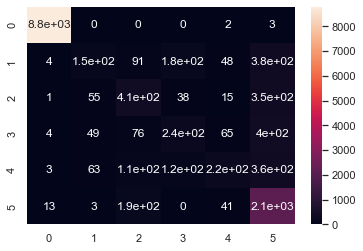

In [139]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

----
## 4. Evaluation<a name="5"></a>
----